In [1]:
%load_ext autoreload
%autoreload 2

import os
import warnings

import jax.numpy as jnp
import matplotlib.pyplot as plt
from IPython.display import Image, display
import numpy as np
from matplotlib import rcParams  # type: ignore

from jaxcmr.helpers import (
    generate_trial_mask,
    import_from_string,
    load_data,
)
from jaxcmr import repetition

warnings.filterwarnings("ignore")

# Setup

In [2]:
# data params
data_tag = "RepeatedRecallsLohnasKahana2014"
trial_query = "data['list_type'] > 0"
control_trial_query = "data['list_type'] == 1"
data_path = "data/RepeatedRecallsLohnasKahana2014.h5"
run_tag = "full_best_of_3"
target_dir = "projects/thesis"
redo_figures = True
filter_repeated_recalls = False
model_name = "data"

# analysis paths
single_analysis_paths = [
    "jaxcmr.analyses.repcrp.plot_rep_crp",
    "jaxcmr.analyses.backrepcrp.plot_back_rep_crp",
]

comparison_analysis_paths = [
    "jaxcmr.analyses.spc.plot_spc",
    "jaxcmr.analyses.crp.plot_crp",
    "jaxcmr.analyses.pnr.plot_pnr",
    "jaxcmr.analyses.repneighborcrp.plot_repneighborcrp_i2j",
    "jaxcmr.analyses.repneighborcrp.plot_repneighborcrp_j2i",
    "jaxcmr.analyses.repneighborcrp.plot_repneighborcrp_both",
    "jaxcmr.analyses.rpl.plot_rpl",
    "jaxcmr.analyses.rpl.plot_full_rpl",
]

In [3]:
# add subdirectories for each product type: json, figures, h5
product_dirs = {}
for product in ["figures"]:
    product_dir = os.path.join(target_dir, product)
    product_dirs[product] = product_dir
    if not os.path.exists(product_dir):
        os.makedirs(product_dir)

data = load_data(data_path)
trial_mask = generate_trial_mask(data, trial_query)

max_size = np.max(data["pres_itemnos"])
connections = jnp.zeros((max_size, max_size))

single_analyses = [import_from_string(path) for path in single_analysis_paths]
comparison_analyses = [import_from_string(path) for path in comparison_analysis_paths]

![](projects/thesis/figures/RepeatedRecallsLohnasKahana2014_mixed_data_full_best_of_3_LT4_rep_crp.png)


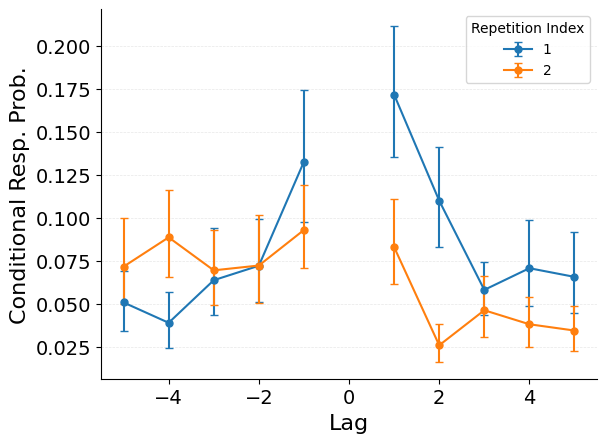

![](projects/thesis/figures/RepeatedRecallsLohnasKahana2014_control_data_full_best_of_3_LT4_rep_crp.png)


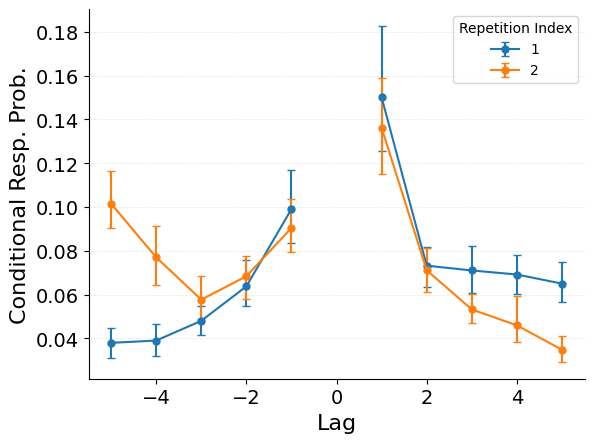

![](projects/thesis/figures/RepeatedRecallsLohnasKahana2014_mixed_data_full_best_of_3_LT4_back_rep_crp.png)


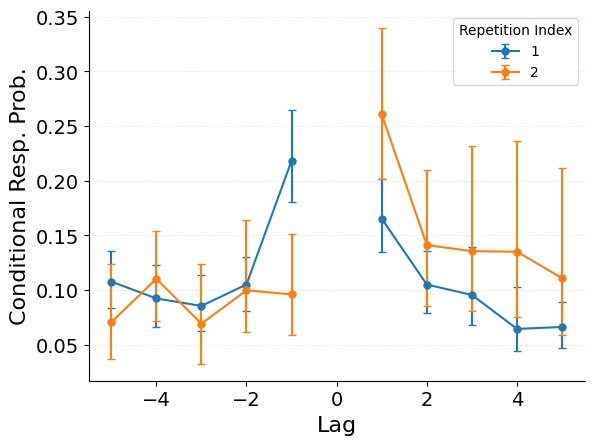

![](projects/thesis/figures/RepeatedRecallsLohnasKahana2014_control_data_full_best_of_3_LT4_back_rep_crp.png)


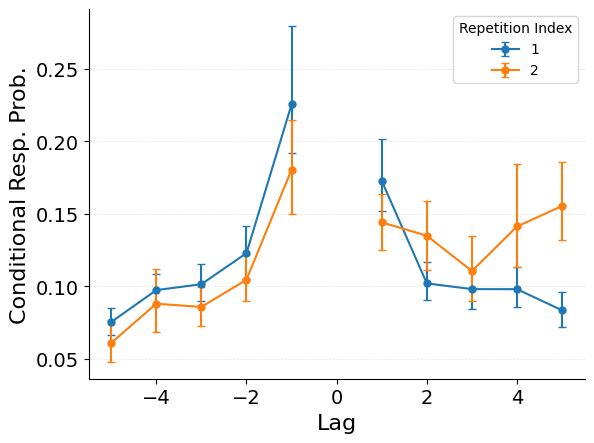

![](projects/thesis/figures/RepeatedRecallsLohnasKahana2014_mixed_data_full_best_of_3_LT34_rep_crp.png)


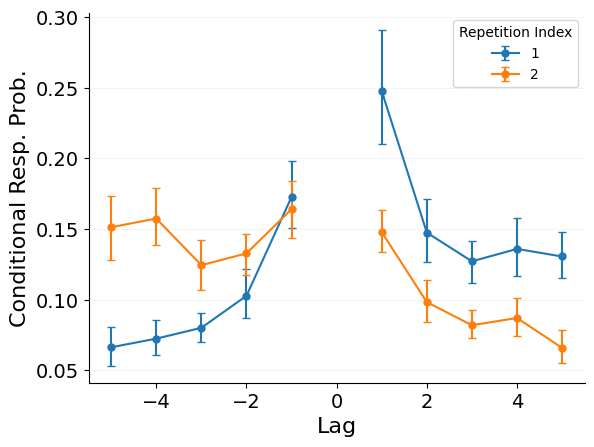

![](projects/thesis/figures/RepeatedRecallsLohnasKahana2014_control_data_full_best_of_3_LT34_rep_crp.png)


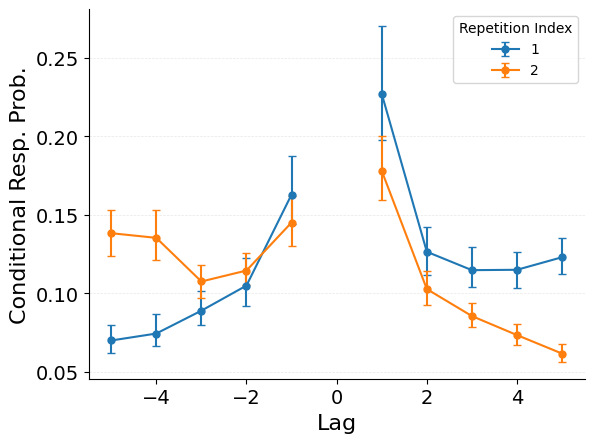

![](projects/thesis/figures/RepeatedRecallsLohnasKahana2014_mixed_data_full_best_of_3_LT34_back_rep_crp.png)


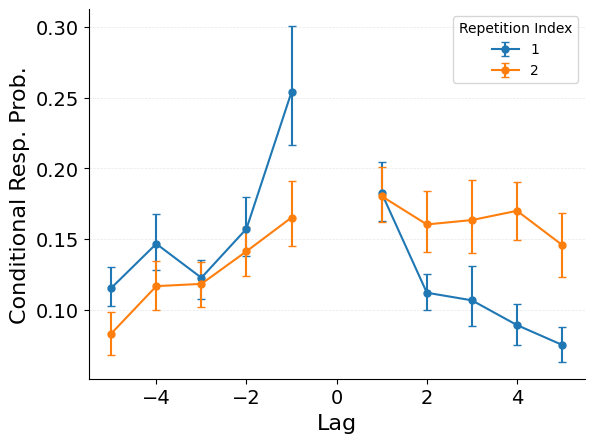

![](projects/thesis/figures/RepeatedRecallsLohnasKahana2014_control_data_full_best_of_3_LT34_back_rep_crp.png)


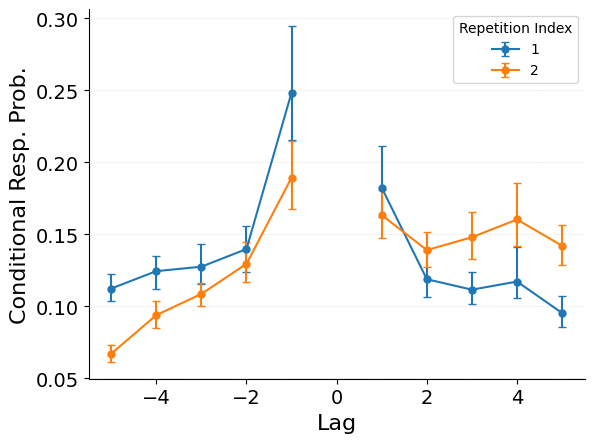

In [4]:
#|code-summary: single-dataset views

for combined_LT, lt_values in [
    ("4", [4]),
    ("34", [3, 4]),
]:
    for analysis in single_analyses:
        figure_str = f"{data_tag}_mixed_data_{run_tag}_LT{combined_LT}_{analysis.__name__[5:]}.png"
        figure_path = os.path.join(product_dirs["figures"], figure_str)
        print(f"![]({figure_path})")

        # if redo_figures, check if figure already exists and don't redo
        # we want to display the figure here if it already exists
        if os.path.exists(figure_path) and not redo_figures:
            display(Image(filename=figure_path))
        else:
            color_cycle = [each["color"] for each in rcParams["axes.prop_cycle"]]

            # Create a mask for data using np.isin for the selected list types
            lt_trial_mask = np.isin(data["list_type"].flatten(), lt_values)

            axis = analysis(
                datasets=[data],
                trial_masks=[np.array(lt_trial_mask)],
                color_cycle=color_cycle,
                labels=["First", "Second"],
                contrast_name="Repetition Index",
                axis=None,
                distances=None,
            )

            plt.savefig(figure_path, bbox_inches="tight", dpi=600)
            plt.show()

        # now the corresponding figure for the control analysis dataset
        figure_str = f"{data_tag}_control_data_{run_tag}_LT{combined_LT}_{analysis.__name__[5:]}.png"
        figure_path = os.path.join(product_dirs["figures"], figure_str)
        print(f"![]({figure_path})")

        # if redo_figures, check if figure already exists and don't redo
        # we want to display the figure here if it already exists
        if os.path.exists(figure_path) and not redo_figures:
            display(Image(filename=figure_path))
        else:
            color_cycle = [each["color"] for each in rcParams["axes.prop_cycle"]]

            ctrl_data = repetition.make_control_dataset(
                data,
                mixed_query=f"jnp.isin(data['list_type'], jnp.array({lt_values}))",
                control_query=control_trial_query,
                n_shuffles=10,
                seed=0,
                remove_repeats=filter_repeated_recalls,
            )
            control_trial_mask = jnp.ones((ctrl_data["recalls"].shape[0],), dtype=bool)

            axis = analysis(
                datasets=[ctrl_data],
                trial_masks=[np.array(control_trial_mask)],
                color_cycle=color_cycle,
                labels=["First", "Second"],
                contrast_name="Repetition Index",
                axis=None,
                distances=None,
            )
            plt.savefig(figure_path, bbox_inches="tight", dpi=600)
            plt.show()

![](projects/thesis/figures/RepeatedRecallsLohnasKahana2014_mixedvscontrolA_data_full_best_of_3_LT4_spc.png)


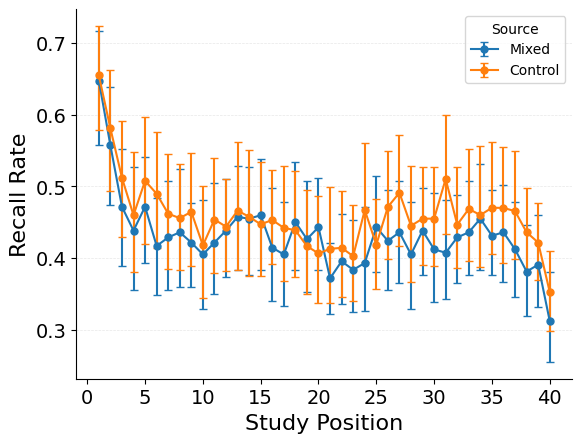

![](projects/thesis/figures/RepeatedRecallsLohnasKahana2014_mixedvscontrolB_data_full_best_of_3_LT4_spc.png)


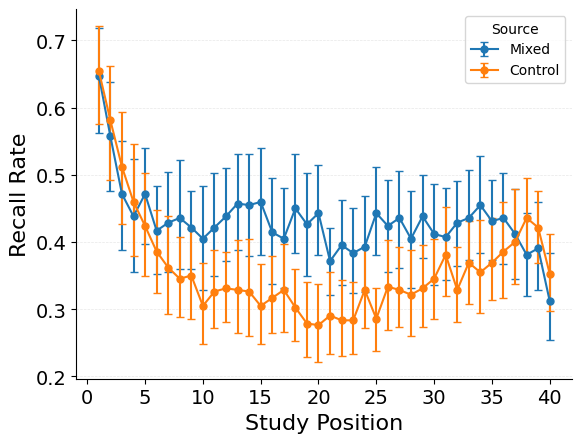

![](projects/thesis/figures/RepeatedRecallsLohnasKahana2014_mixedvscontrolA_data_full_best_of_3_LT4_crp.png)


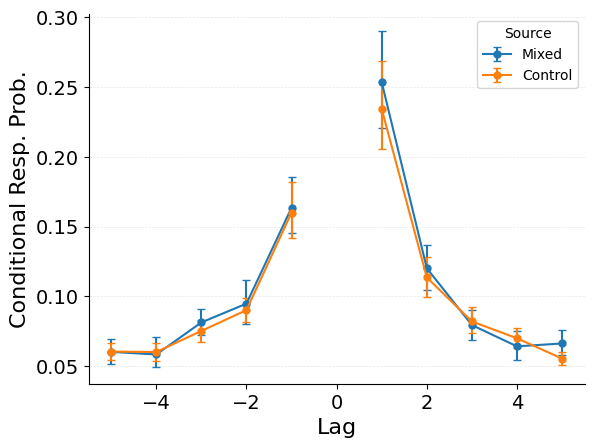

![](projects/thesis/figures/RepeatedRecallsLohnasKahana2014_mixedvscontrolB_data_full_best_of_3_LT4_crp.png)


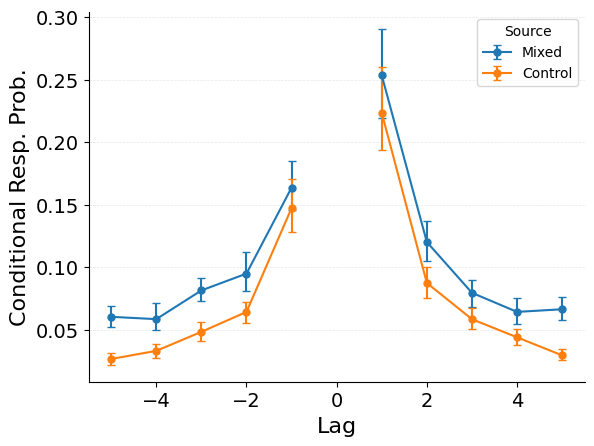

![](projects/thesis/figures/RepeatedRecallsLohnasKahana2014_mixedvscontrolA_data_full_best_of_3_LT4_pnr.png)


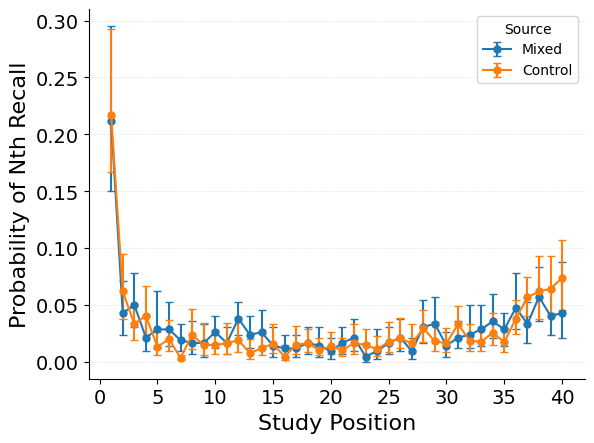

![](projects/thesis/figures/RepeatedRecallsLohnasKahana2014_mixedvscontrolB_data_full_best_of_3_LT4_pnr.png)


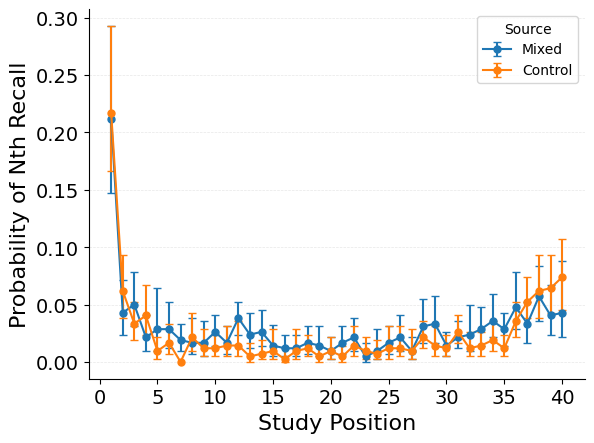

![](projects/thesis/figures/RepeatedRecallsLohnasKahana2014_mixedvscontrolA_data_full_best_of_3_LT4_repneighborcrp_i2j.png)


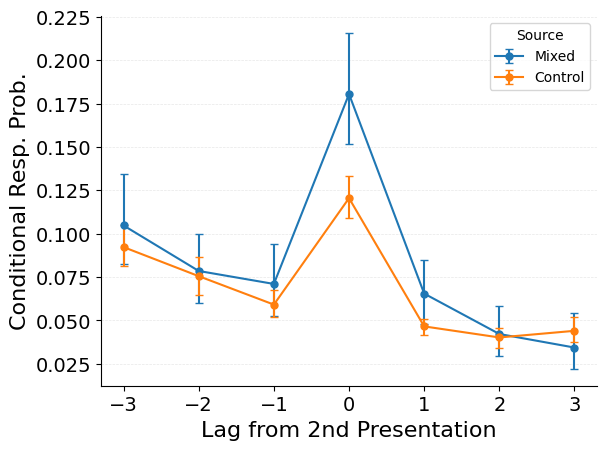

![](projects/thesis/figures/RepeatedRecallsLohnasKahana2014_mixedvscontrolA_data_full_best_of_3_LT4_repneighborcrp_j2i.png)


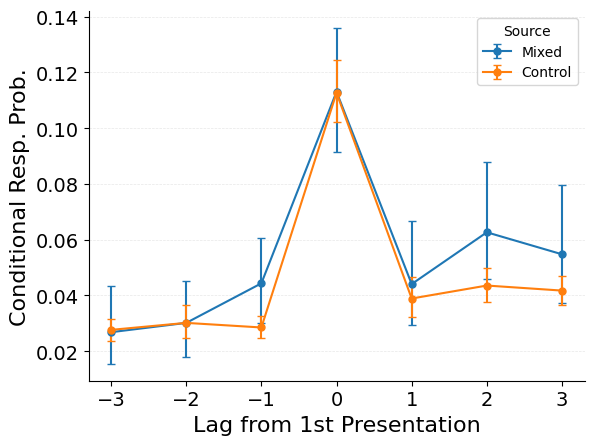

![](projects/thesis/figures/RepeatedRecallsLohnasKahana2014_mixedvscontrolA_data_full_best_of_3_LT4_repneighborcrp_both.png)


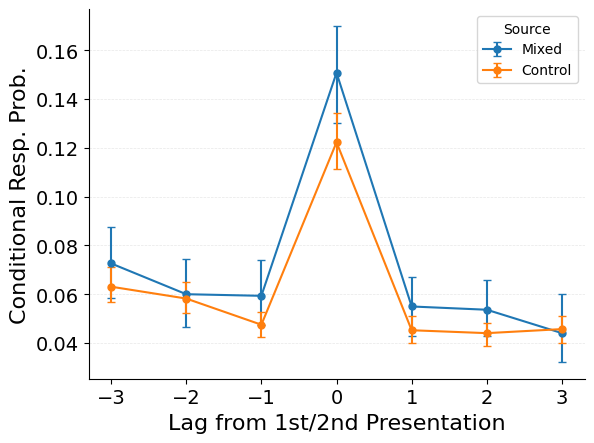

![](projects/thesis/figures/RepeatedRecallsLohnasKahana2014_mixedvscontrolA_data_full_best_of_3_LT4_rpl.png)


ValueError: format number 1 of "1-2" is not recognized

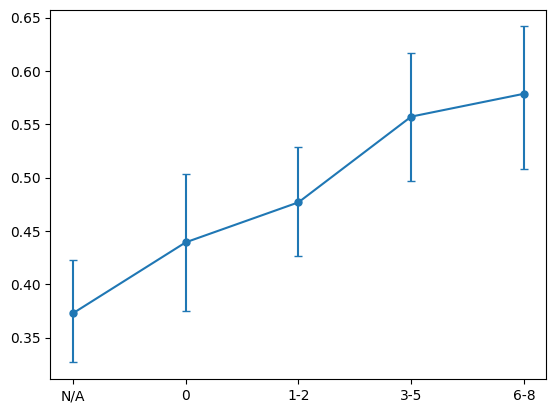

In [5]:
#| code-summary: mixed vs control views

for combined_LT, lt_values in [
    ("4", [4]),
    ("34", [3, 4]),
]:
    for analysis in comparison_analyses:

        figure_str = f"{data_tag}_mixedvscontrolA_data_{run_tag}_LT{combined_LT}_{analysis.__name__[5:]}.png"
        figure_path = os.path.join(product_dirs["figures"], figure_str)
        print(f"![]({figure_path})")

        # if redo_figures, check if figure already exists and don't redo
        # we want to display the figure here if it already exists
        if os.path.exists(figure_path) and not redo_figures:
            display(Image(filename=figure_path))

        else:
            color_cycle = [each["color"] for each in rcParams["axes.prop_cycle"]]

            # Create a mask for data using np.isin for the selected list types
            lt_trial_mask = np.isin(data["list_type"].flatten(), lt_values)

            ctrl_data =  repetition.make_control_dataset(
                data, mixed_query=f"np.isin(data['list_type'].flatten(), {lt_values})",
                control_query=control_trial_query, n_shuffles=10, seed=0, remove_repeats=filter_repeated_recalls)
            control_trial_mask = jnp.ones((ctrl_data["recalls"].shape[0],), dtype=bool)

            axis = analysis(
                datasets=[data, ctrl_data],
                trial_masks=[np.array(lt_trial_mask), np.array(control_trial_mask)],
                color_cycle=color_cycle,
                labels=["Mixed", "Control"],
                contrast_name="Source",
                axis=None,
                distances=None,
            )

            plt.savefig(figure_path, bbox_inches="tight", dpi=600)
            plt.show()

        # for non rep analyses, we'll also plot the mixed vs control
        # without our make_control_dataset remapping of study lists to trials
        if "rep" in analysis.__name__:
            continue
        figure_str = f"{data_tag}_mixedvscontrolB_data_{run_tag}_LT{combined_LT}_{analysis.__name__[5:]}.png"
        figure_path = os.path.join(product_dirs["figures"], figure_str)
        print(f"![]({figure_path})")

        # if redo_figures, check if figure already exists and don't redo
        # we want to display the figure here if it already exists
        if os.path.exists(figure_path) and not redo_figures:
            display(Image(filename=figure_path))
        
        else:

            color_cycle = [each["color"] for each in rcParams["axes.prop_cycle"]]

            # Create a mask for data using np.isin for the selected list types
            lt_trial_mask = np.isin(data["list_type"].flatten(), lt_values)

            control_trial_mask = generate_trial_mask(data, control_trial_query)

            axis = analysis(
                datasets=[data, data],
                trial_masks=[np.array(lt_trial_mask), np.array(control_trial_mask)],
                color_cycle=color_cycle,
                labels=["Mixed", "Control"],
                contrast_name="Source",
                axis=None,
                distances=None,
            )

            plt.savefig(figure_path, bbox_inches="tight", dpi=600)
            plt.show()
